In [33]:
import cv2
import os
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import webcolors
import numpy as np
import random

In [34]:
current_working_directory = os.getcwd()
parent_working_directory = os.path.dirname(current_working_directory) # go up one directory

csv_location = os.path.join(parent_working_directory, "2-Read_ImgLabels_Resizer_From_CSV", "cars_train_new_labels-512.csv")

In [35]:
car_csv = pd.read_csv(csv_location)

In [36]:
print(car_csv.head())

    filepath   x1   y1   x2   y2  class_name
0  00001.jpg   33  148  485  480          14
1  00002.jpg   20   87  493  445           3
2  00003.jpg   68  116  480  406          91
3  00004.jpg  151  145  361  404         134
4  00005.jpg   49  170  472  469         106


In [37]:
IMAGE_ID = 7
filepath = car_csv["filepath"][IMAGE_ID]

x1 = car_csv["x1"][IMAGE_ID]
y1 = car_csv["y1"][IMAGE_ID]
x2 = car_csv["x2"][IMAGE_ID]
y2 = car_csv["y2"][IMAGE_ID]

class_name = car_csv["class_name"][IMAGE_ID]
print(filepath, x1, y1, x2, y2, class_name)

00008.jpg 58 84 473 437 96


In [38]:
img_location = os.path.join(parent_working_directory, "2-Read_ImgLabels_Resizer_From_CSV", "cars_train_new", filepath)
img = cv2.imread(img_location)

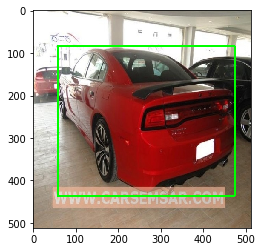

In [39]:
action = cv2.rectangle(img,(x1, y1),(x2, y2),(0,255,0),3)
plt_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)
plt.show()

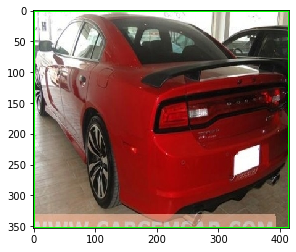

In [40]:
image_region = img[y1:y2, x1:x2]
plt_image_image_region = cv2.cvtColor(image_region, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image_image_region)
plt.show()

In [85]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

def get_colour_from_img(photo):
    red_arr = []
    green_arr = []
    blue_arr = []
    
    
    width = int(photo.shape[0])
    height = int(photo.shape[1])
    
    # Scan through all the entire picture for values of the 
    for w in range(width):
        for h in range(height):
            all_colors = photo[w,h,:]
            red = all_colors[2]
            green = all_colors[1]
            blue = all_colors[0]
            
            red_arr.append(red)
            green_arr.append(green)
            blue_arr.append(blue)
    
    red_final = int(np.average(red_arr))
    green_final = int(np.average(green_arr))
    blue_final = int(np.average(blue_arr))
    rgb_final = [red_final, green_final, blue_final]
    
    _, closest_name = get_colour_name(rgb_final)
    #print(closest_name)
    #print(actual_name, closest_name)
    #print("red", red_final, "green", green_final, "blue", blue_final)
    
    return closest_name

In [86]:
color_arr = []
color_numpy = np.array(color_arr)
for x in range(1000):
    try:
        x1_new = random.randint(0, image_region.shape[0])
        y1_new = random.randint(0, image_region.shape[1])

        x2_new = random.randint(x1_new, image_region.shape[0])
        y2_new = random.randint(y1_new, image_region.shape[1])
    
        color_computed = get_colour_from_img(image_region[x1_new:y1_new,x2_new:y2_new])
        print(color_computed)
        
    except Exception as e:
        print("error")

error
error
error
error
saddlebrown
darkkhaki
error
saddlebrown
error
maroon
error
saddlebrown
saddlebrown
maroon
darkolivegreen
error
saddlebrown
error
error
saddlebrown
error
saddlebrown
dimgrey
dimgrey
maroon
error
darkolivegreen
brown
dimgrey
error
saddlebrown
darkslategrey
error
dimgrey
error
error
maroon
saddlebrown
error
saddlebrown
error
error
saddlebrown
sienna
error
error
saddlebrown
saddlebrown
error
saddlebrown
error
error
indianred
error
error
saddlebrown
maroon
error
error
saddlebrown
saddlebrown
darkolivegreen
darkolivegreen
error
saddlebrown
black
error
darkslategrey
saddlebrown
error
brown
darkslategrey
dimgrey
error
saddlebrown
maroon
error
saddlebrown
error
error
darkslategrey
maroon
saddlebrown
saddlebrown
maroon
error
error
error
saddlebrown
error
dimgrey
error
error
error
saddlebrown
maroon
error
error
error
darkseagreen
error
error
error
maroon
error
error
sienna
error
darkolivegreen
maroon
error
error
error
gray
maroon
gray
error
darkseagreen
black
maroon
error
